## Der Laserstrahl und seine Interaktion mit der Erdoberfläche (cf. Wagner 2003)
[Link](https://drive.google.com/drive/folders/1VgwUhkDOaZZZA309OB-IS88gZsQBUSsz). Relevante physikalische Grundlagen. Interessant: Interaktion des Laserstrahls mit der Erdoberfläche / Streuquerschnitt verschiedener Objekte und Impulsform.

Für die Streuung an einer Fläche erhält man
    $$\sigma_{\text{Fläche}} = \pi \rho_{\text{Fläche}} R^2 \beta_S^2 \propto R^2.$$
    
Und für die Impulsform:
        $$P_{E}(t) = \int_{R_0}^{R_1} \frac{D_E^2}{4\pi R^4 \beta_S^2} \eta_{\text{SYS}} \eta_{\text{ATM}} P_S\left(t-\frac{2R}{v_g}\right)\sigma(R) dR$$

die vereinfacht werden kann, indem alle Konstanten zusammengefasst werden ($\sigma(R) = \sigma_{\text{Fläche}}$):
        $$P_E(t) = C \int_{R_0}^{R_1} \frac{1}{R^2}P_S\left(t-\frac{2R}{v_g}\right) dR$$
        
Der Abfall des Signals scheint eher proportional zu $1/t$ statt $e^{-t}$ zu sein (wenn von konstanter Streufläche ausgegangen wird!) Siehe auch:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sympy import *
from sympy.abc import tau
from math import pi
R,t,tprime,h,k,lR = symbols("R t tprime h k lR")

# constants
# values taken from Wagner2003
v = 3*10**8 # [m/s]
pulselength = 10*10**-9 # [s]
pulseenergy = 100*10**-6 # [J]
D_E = 0.1 # [m]
eta_SYS = 1
eta_ATM = 0.9
pulsepower = pulseenergy/pulselength
beta_S = 10**-3 # [rad]
rho_Flaeche = 0.01
# calculate constant factor from example values
C = rho_Flaeche*D_E**2/4*eta_SYS*eta_ATM


# define sent impulse (rectangle w/ amplitude = pulsepower and signal length = pulselength)
P_S = Piecewise((0, t<=0), (0, t>pulselength), (pulsepower,True))

sent signal


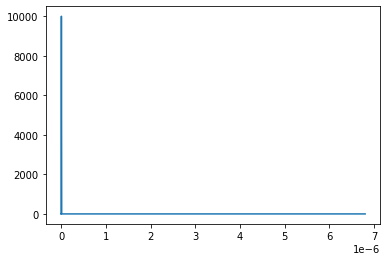

In [2]:
# visualize sent signal
xs = np.linspace(-10**-8,6.8e-06,1000)
yss = np.array(list(map(lambda val: P_S.subs(t,val), xs)))
print("sent signal")
plt.plot(xs,yss)

In [3]:
R1 = 400 # [m]
R2 = 500

# define & solve indefinite integral
P_E = integrate(1/R**2*P_S.subs(t, t - 2*R/v), R)

# define & solve indefinite integral
P_E1 = C*P_E
# solve for lower and upper bound respectively
result = P_E1.subs(R,R2) - P_E1.subs(R,R1)
# print indefinite integral
P_E

Piecewise((0, R < 150000000.0*t - 1.5), (10000.0/(150000000.0*t - 1.5) - 10000.0/R, R <= 150000000*t), (10000.0/(150000000.0*t - 1.5) - 6.66666666666667e-5/t, True))

received signal


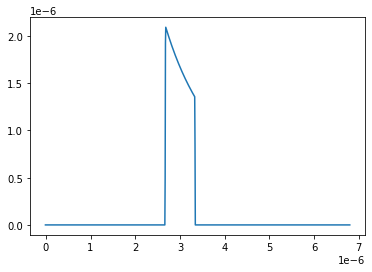

In [4]:
ysr = np.array(list(map(lambda val: result.subs(t,val), xs)))
# visualize received signal
print("received signal")
plt.plot(xs,ysr)

Das Signal kommt deutlich geschwächt an: Stärke des ausgehenden Signals ~ $kW$, Stärke des eingehenden Signals ~ $\mu W$. Vergl. dazu auch Wagner2003 (16). Wie verhält es sich bei mehreren Volumen?

received signal


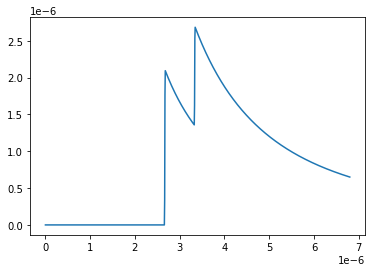

In [23]:
# calculate constant factor from example values
C1 = C*0.01
C2 = C
C3 = C2*2

R1 = 400
R2 = 500
R3 = oo

# define sent impulse (rectangle w/ amplitude = pulsepower and signal length = pulselength)
P_S = Piecewise((0, t<=0), (0, t>pulselength), (pulsepower,True))

# define & solve indefinite integral
P_E = integrate(1/R**2*P_S.subs(t, t - 2*R/v), R)
P_E1 = C1*P_E
P_E2 = C2*P_E
P_E3 = C3*P_E

# solve for lower and upper bound (R0/R1) respectively
result = (  # (P_E1.subs(R,R1) - P_E1.subs(R,0)) # division by 0
          + (P_E2.subs(R,R2) - P_E2.subs(R,R1))
          + (P_E3.subs(R,R3) - P_E3.subs(R,R2)))

# visualize received signal
xs = np.linspace(0,6.8e-06,1000)
ysr = np.array(list(map(lambda val: result.subs(t,val), xs)))
yss = np.array(list(map(lambda val: P_S.subs(t,val), xs)))

print("received signal")
plt.plot(xs,ysr)

Eigentlich sollte der Abfall beim Boden doch viel höher sein. Das Problem ist vielleicht die Annahme, dass immer $\sigma(R) = R^2$ gilt. Abhängig von den durchlaufenen Volumen sollte die Streuung doch sicher abnehmen, oder nicht?

## Integrales Dämpfungsmodell (cf. Richter 2018) 
Idee: Pulsintensität wird kontinuierlich abgeschwächt, indem schrittweise mit einem bestimmten Faktor multipliziert wird. Leicht andere Idee: man kann die Ziele in "Schichten" aufteilen. Beispielsweise in Luft ($i=1$), Wasser ($i=2$) und Boden ($i=3$). Jede dieser Schichten hat eine gewisse Durchlässigkeit, die einen Teil des Strahls eliminieren. Außerdem beginnt jede Schicht ab einer bestimmten Reichweite $R_{i-1}$ und läuft bis zu dem Beginn der nächsten Schicht $R_i$; die letzte Schicht läuft bis $R_m=\infty$. Die Erste beginnt bei $R_0=0$.

In jeder Schicht gibt es einen exponentiellen Abfall des Lichtanteils $p$, der diese Schicht verlässt. Nimmt man an, dass es nur eine Schicht gibt, gilt $p(R) = \exp(-k R)$. $R$ ist dabei die zurückgelegte Distanz des Lichts in dieser Schicht und $k$ ein Faktor abhängig von der Zusammensetzung der Schicht, der angibt, wie stark dieser exponentielle Abfall ist. Bei mehreren Schichten durchläuft der Lichtstrahl eine Schicht nach der anderen, womit sich

$$p(R) = \left( \prod_{i=1}^{n-1} \exp(-k_i(R_i - R_{i-1}) \right) \exp(-k_n(R - R_{n-1}))$$

ergibt. $n$ ist dabei der Index der Schicht, für die $R \in [R_n, R_{n-1}]$ gilt.

Beispielsweise können wir $k_1=0.0001, k_2=0.003, k_3=2$ mit $R_1=1000,R_2=1100,R_3=\infty$ annehmen. D.h. Luft geht von Anfang bis 1000m, dann 100m Wasser und dann Boden (für "immer").

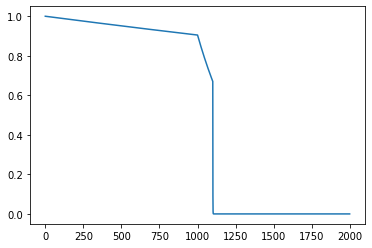

In [24]:
from math import inf, e

# example: three layers; air, water, ground.
layers = [(0.0001,1000), (0.003,1100), (2,inf)] # (ki, Ri)

def p(R):
    ret, Rlast = 1, 0
    for ki,Ri in layers:
        if Ri > R:
            return ret*e**(-ki*(R-Rlast))
        else:
            ret *= e**(-ki*(Ri-Rlast))
            Rlast = Ri

xs = np.arange(2000)
ps = list(map(p, xs))

import matplotlib.pyplot as plt
plt.plot(xs,ps)

Zuerst können annehmen, dass $\sigma(R) = \sigma_{\text{Fläche}} p(R)$ gilt, und eine Verallgemeinerung von $P_E(t)$ auf mehrere Schichten betrachten:

$$P_E(t) = \sum_{i=1}^m C_i \int_{R_{i-1}}^{R_i} \frac{1}{R^2}P_S\left(t-\frac{2R}{v_g}\right) p(R) dR$$

einsetzen von $p(R)$ ergibt

$$P_E(t) = \sum_{i=1}^m C_i \int_{R_{i-1}}^{R_i} \frac{1}{R^2}P_S\left(t-\frac{2R}{v_g}\right) \left( \prod_{j=1}^{i-1} \exp(-k_j(R_j - R_{j-1}) \right) \exp(-k_i (R - R_{i-1})) dR,$$

da $R \in [R_{i-1}, R_i]$ gilt. Ausklammern von konstanten Termen ergibt dann

$$P_E(t) = \sum_{i=1}^m C_i' \int_{R_{i-1}}^{R_i} \frac{1}{R^2}P_S\left(t-\frac{2R}{v_g}\right) \exp(-k_i (R - R_{i-1})) dR,$$

In [ ]:
# calculate constant factor from example values. ignore air.
R0 = 400
C1, k1, R1 = C, 0.0003, 500 
C2, k2, R2 = C2*2, 0.002, oo

# define & solve indefinite integral
integral = integrate(1/R**2*P_S.subs(t, t - 2*R/v)*exp(-k*(R - lR)), R)
P_E = C1*integral.subs(k,k1).subs(lR, R1)



# define sent impulse (rectangle w/ amplitude = pulsepower and signal length = pulselength)
P_S = Piecewise((0, t<=0), (0, t>pulselength), (pulsepower,True))

P_E1 = C1*P_E
P_E2 = C2*P_E
P_E3 = C3*P_E

# solve for lower and upper bound (R0/R1) respectively
result = (  # (P_E1.subs(R,R1) - P_E1.subs(R,0)) # division by 0
          + (P_E2.subs(R,R2) - P_E2.subs(R,R1))
          + (P_E3.subs(R,R3) - P_E3.subs(R,R2)))

# visualize received signal
xs = np.linspace(0,6.8e-06,1000)
ysr = np.array(list(map(lambda val: result.subs(t,val), xs)))
yss = np.array(list(map(lambda val: P_S.subs(t,val), xs)))

print("received signal")
plt.plot(xs,ysr)